In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hotel-dataset.csv')

In [3]:
df.sample(20)

,name,ratings,reviews,price,city,stay
2856,"Seelan Nadar Holiday Resort,Mumbai",7.700000,Review score,483,Mumbai,13
13403,"Lemon Tree Premier, Ulsoor Lake, Bengaluru",6.300000,Exceptional,153,Bangalore,2
13110,Itsy By Treebo - Classio Richmond,7.300000,Good,39,Bangalore,2
4834,THE MUSAFIR HOSTEL,5.500000,Very good,10,Goa,2
2654,Hotel Ashyana-Grant Road Mumbai,7.500000,Very good,478,Mumbai,13
4551,FabHotel Bliss Executive,8.500000,Very good,233,Pune,13
11561,The Crown,7.700000,Review score,22,Kolkata,2
15050,Capital O Green Residency,6.958472,Good,50,Bangalore,6
11034,Heistel Delhi,1.000000,Good,70,New-Delhi,13
9217,Hotel Anand International,7.700000,Exceptional,135,New-Delhi,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16421 entries, 0 to 16420
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     16421 non-null  object 
 1   ratings  16421 non-null  float64
 2   reviews  16421 non-null  object 
 3   price    16421 non-null  object 
 4   city     16421 non-null  object 
 5   stay     16421 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 769.9+ KB


In [5]:
df.isnull().sum()

name       0
ratings    0
reviews    0
price      0
city       0
stay       0
dtype: int64

In [6]:
df.describe()

,ratings,stay
count,16421.000000,16421.000000
mean,6.958472,6.695025
std,1.730717,3.866331
min,1.000000,2.000000
25%,6.400000,4.000000
50%,7.100000,6.000000
75%,8.000000,9.000000
max,10.000000,13.000000


In [13]:
df['price']=df['price'].str.replace(",","").astype('int')

In [14]:
df['price'].dtype

dtype('int64')

In [15]:
df.describe()

,ratings,price,stay
count,16421.000000,16421.000000,16421.000000
mean,6.958472,209.841910,6.695025
std,1.730717,453.619945,3.866331
min,1.000000,4.000000,2.000000
25%,6.400000,64.000000,4.000000
50%,7.100000,124.000000,6.000000
75%,8.000000,230.000000,9.000000
max,10.000000,27915.000000,13.000000


In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ratings,price,stay
ratings,1.000000,0.017262,-0.034505
price,0.017262,1.000000,0.230214
stay,-0.034505,0.230214,1.000000


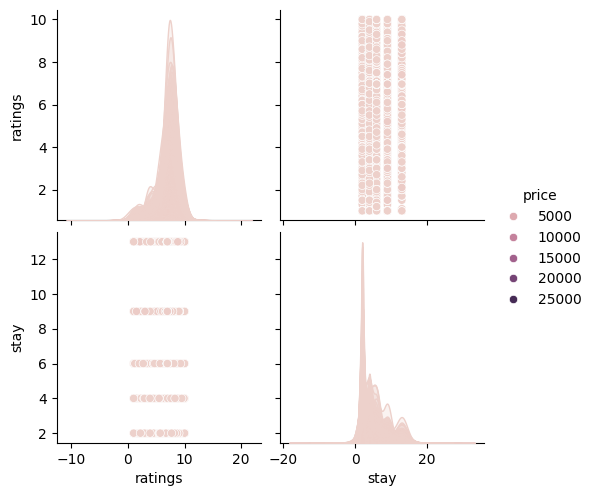

In [17]:
sns.pairplot(df,hue='price')

<Axes: xlabel='stay', ylabel='price'>

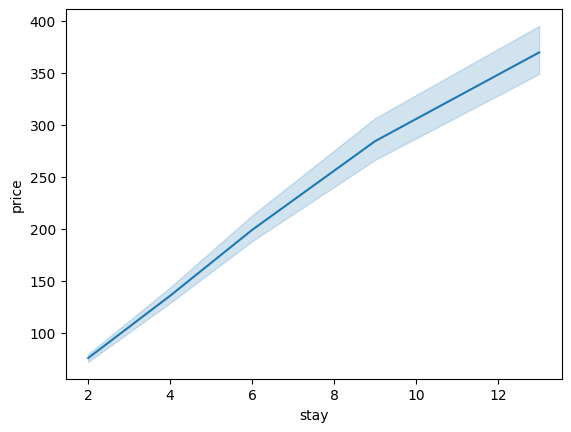

In [18]:
sns.lineplot(df,x='stay',y='price')

In [19]:
df.drop(columns=['ratings','reviews','name'],inplace=True)

In [20]:
df.shape

(16421, 3)

<Axes: ylabel='city'>

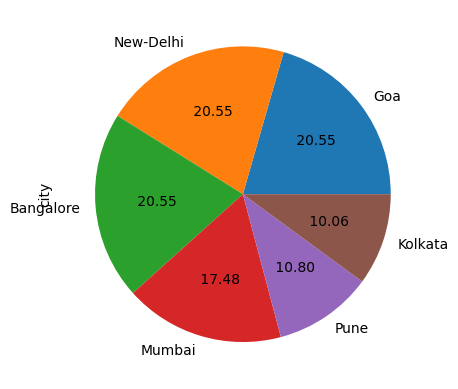

In [21]:
df['city'].value_counts().plot(kind='pie',autopct="% .2f")

<Axes: xlabel='city', ylabel='count'>

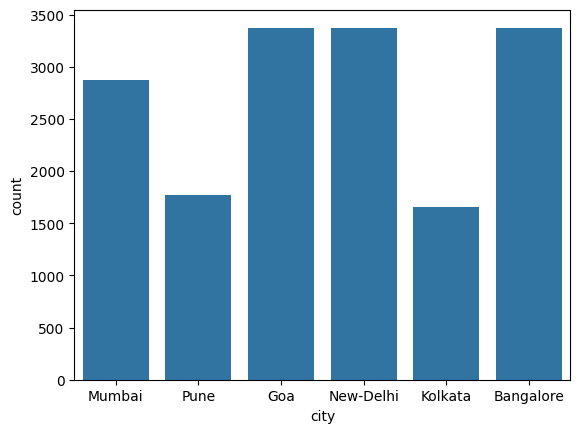

In [22]:
sns.countplot(df,x='city')

In [23]:
city_dict=df["city"].value_counts().to_dict()

In [24]:
city_dict

{'Goa': 3375,
 'New-Delhi': 3375,
 'Bangalore': 3375,
 'Mumbai': 2870,
 'Pune': 1774,
 'Kolkata': 1652}

In [25]:
df["city"]=df["city"].replace(city_dict)

In [26]:
df=pd.get_dummies(df, drop_first=True)

In [27]:
df.sample(20)

,price,city,stay
556,39,2870,2
14323,108,3375,4
11063,354,3375,13
9378,75,3375,6
16406,182,3375,13
12410,84,1652,6
5270,54,3375,2
8462,23,3375,2
14936,119,3375,6
13665,45,3375,2


In [32]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [34]:
X.shape,y.shape

((16421, 2), (16421,))

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
y.head()

0     84
1    293
2    325
3    283
4    410
Name: price, dtype: int64

In [39]:
trf1 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,3))
])

In [58]:
trf2=RandomForestRegressor(n_estimators=200,max_depth=18)

In [59]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
])

In [60]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 3, None))])),
                ('trf2',
                 RandomForestRegressor(max_depth=18, n_estimators=200))])

In [61]:
pipe.named_steps

{'trf1': ColumnTransformer(transformers=[('scale', StandardScaler(), slice(0, 3, None))]),
 'trf2': RandomForestRegressor(max_depth=18, n_estimators=200)}

In [62]:
y_pred = pipe.predict(X_test)

In [63]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.056363015696280994

In [64]:
test_input=np.array([2870,2]).reshape(1,2)


In [65]:
pipe.predict(test_input)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


91.4487587534734

In [66]:
test_input=np.array([3375,4]).reshape(1,2)

In [67]:
pipe.predict(test_input)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


138.79392410914414

In [68]:
!pip install xgboost

In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [94]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 18, n_estimators = 500)

In [95]:
xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.05670903373028002


In [97]:
test_input=np.array([2870,2]).reshape(1,2)


In [98]:
xg_reg.predict(test_input)[0]

118.16618

In [101]:
test_input=np.array([1652,7]).reshape(1,2)
pipe.predict(test_input)[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


141.0971203144251

In [102]:
n_estimators=[100,200,300]
max_depth=[10,12,14]
min_samples_split=[2,4,6]
min_samples_leaf=[1,2,3]
criterion=["squared_error", "friedman_mse", "poisson"]

In [103]:
param_dict={"max_depth":max_depth,
            "n_estimators":n_estimators,
            "min_samples_leaf": min_samples_leaf,
            "min_samples_split":min_samples_split,
            "criterion":criterion,
           }

In [104]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestRegressor()

gsv= GridSearchCV(rf,param_grid=param_dict,scoring="r2", n_jobs=-1,cv=3,verbose=5,return_train_score=True)

In [105]:
gsv.fit(X_train,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [10, 12, 14],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='r2', verbose=5)

In [106]:
gsv.best_score_

0.07491175372220538

In [107]:
gsv.best_params_

{'criterion': 'poisson',
 'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [129]:
trf2=RandomForestRegressor(n_estimators=100,max_depth=12,criterion='poisson',min_samples_leaf=3,min_samples_split=4)

In [130]:
pipe=Pipeline([
    ('trf2',trf2),
])

In [131]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf2',
                 RandomForestRegressor(criterion='poisson', max_depth=12,
                                       min_samples_leaf=3,
                                       min_samples_split=4))])

In [132]:
pipe.named_steps

{'trf2': RandomForestRegressor(criterion='poisson', max_depth=12, min_samples_leaf=3,
                       min_samples_split=4)}

In [133]:
y_pred = pipe.predict(X_test)

In [134]:
r2_score(y_test,y_pred)

0.05631676773781835

In [135]:
rf=RandomForestRegressor(n_estimators=100,max_depth=12,criterion='poisson',min_samples_leaf=3,min_samples_split=4)

In [136]:
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=12, min_samples_leaf=3,
                      min_samples_split=4)

In [137]:
y_pred = rf.predict(X_test)

In [138]:
r2_score(y_test,y_pred)

0.056645972796876554

In [141]:
test_input=np.array([2870,2]).reshape(1,2)
pipe.predict(test_input)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


89.8460848613437

In [142]:
import pickle

pickle.dump(pipe,open('rfpipe.pkl','wb'))